In [8]:
'''
P2P

with normalisation
'''

'\nP2P\n\nwith normalisation\n'

In [2]:
from __future__ import print_function, division
import time

from matplotlib import rcParams
import matplotlib.pyplot as plt

from nilmtk import DataSet, TimeFrame, MeterGroup, HDFDataStore


import random
import sys
import pandas as pd
import numpy as np
import h5py


In [4]:
# =====Define paramaters======
info = {'filename': 'C:/Users/dimit/Desktop/Msc Business Analytics/Dissertation/My_code/redd.h5',
        'meter_label': 'fridge',  # ["kettle" , "microwave" , "dishwasher" , "fridge" , "washing_machine"]
        'train_building': 1,
        'test_building': 1,
        'sample_period': 3
       }

# Parameters
params = {'batch_size': 512,
          'window_size': 50,
          'model_name': 'DAE',
          'shuffle': True}



#test_window = {1: ('30-4-2011', '5-5-2011')}
train_window = {1: (None, '30-4-2011')}
test_window = {1: (None, None)}


def load_dataset(train_window,test_window, filename, meter_label, train_building, test_building, **load_kwargs):
    
        #Load datasets
    train = DataSet(filename)
    test = DataSet(filename)

    test.set_window(*test_window[test_building])
    train.set_window(*train_window[test_building])
    
    x = train.buildings[train_building].elec.mains().all_meters()[0]
    x = x.power_series_all_data(**load_kwargs)
    
    y = train.buildings[train_building].elec.submeters()[meter_label]
    y = y.power_series_all_data(**load_kwargs)
    
    x.fillna(0, inplace=True)
    y.fillna(0, inplace=True)
    ix = x.index.intersection(y.index)
    x = np.array(x[ix])
    y = np.array(y[ix])

    return x ,y 
x , y =load_dataset(train_window,test_window, **info)  

x = np.reshape(x, (x.shape[0],1,1))

C:\Users\dimit\Anaconda3\envs\nilmtk-env\lib\site-packages\nilm_metadata\file_management.py:16: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  objs = yaml.load(fh)


In [5]:
np.max(x)

4505.783

### Nomralise Data

In [6]:
def normalise(data,mmax):
    return data/mmax

def inversenormalise(data,mmax):
    return data*mmax


mmax = np.max(x)
x = normalise(x,mmax)
y = normalise(y,mmax)

# GRU

In [7]:
import random
import sys
import pandas as pd
import numpy as np
import h5py

from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Conv1D, GRU, Bidirectional, Dropout


model = Sequential()

# 1D Conv
model.add(Conv1D(16, 4, activation="relu", padding="same", strides=1, input_shape=(1,1)))
model.add(Conv1D(8, 4, activation="relu", padding="same", strides=1))

# Bi-directional LSTMs
model.add(Bidirectional(GRU(64, return_sequences=True, stateful=False), merge_mode='concat'))
model.add(Bidirectional(GRU(128, return_sequences=False, stateful=False), merge_mode='concat'))

# Fully Connected Layers
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam')

model.fit(x, y, epochs=15, batch_size=128, shuffle=True)

Using TensorFlow backend.
C:\Users\dimit\Anaconda3\envs\nilmtk-env\lib\site-packages\tensorflow\python\keras\backend.py:5201: ResourceWarning: unclosed file <_io.TextIOWrapper name='C:\\Users\\dimit\\.keras\\keras.json' mode='r' encoding='cp1252'>
  _config = json.load(open(_config_path))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/15
334356/334356 [==============================] - 36s 107us/step - loss: 1.8896e-04
Epoch 2/15
334356/334356 [==============================] - ETA: 0s - loss: 1.5326e-0 - 32s 96us/step - loss: 1.5326e-04
Epoch 3/15
334356/334356 [==============================] - 32s 95us/step - loss: 1.4870e-04
Epoch 4/15
334356/334356 [==============================] - 40s 120us/step - loss: 1.4598e-04
Epoch 5/15
334356/334356 [==============================] - 35s 105us/step - loss: 1.4484e-04
Epoch 6/15
334356/334356 [==============================] - 33s 100us/step - loss: 1.4470e-04
Epoch 7/15
334356/334356 [==============================] - 34s 100us/step - loss: 1.4343e-040s - loss: 1.4354
Epoch 8/15
334356/334356 [==============================] - 34s 101us/step - loss: 1.4321e-04
Epoch 9/15
334356/334356 [==============================] - 37s 112us/step - loss: 1.

In [9]:
predict = model.predict(x, batch_size=128)


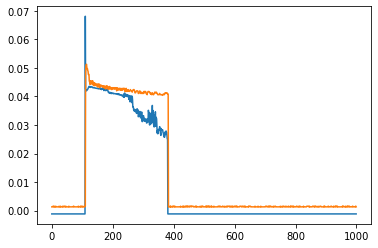

In [10]:
plt.plot(predict[65000:66000])
plt.plot(y[65000:66000])

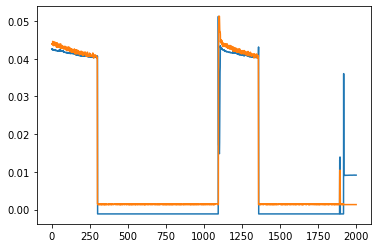

In [15]:
plt.plot(predict[52000:54000])
plt.plot(y[52000:54000])

In [96]:
from keras.layers import Reshape, BatchNormalization, Activation, Flatten, Concatenate

model = Sequential()

# 1D Conv
model.add(Conv1D(30, 10, activation='relu', input_shape=(1,1), padding="same", strides=1))
model.add(Dropout(0.2))
model.add(Conv1D(30, 8, activation='relu', padding="same", strides=1))
model.add(Dropout(0.2))
model.add(Conv1D(40, 6, activation='relu', padding="same", strides=1))
model.add(Dropout(0.2))
model.add(Conv1D(50, 5, activation='relu', padding="same", strides=1))
model.add(Dropout(0.2))
model.add(Conv1D(50, 5, activation='relu', padding="same", strides=1))
model.add(Dropout(0.2))
# Fully Connected Layers
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam')

model.fit(x, y, epochs=15, batch_size=128, shuffle=True)

Epoch 1/15
334356/334356 [==============================] - 30s 89us/step - loss: 6179.0708
Epoch 2/15
334356/334356 [==============================] - 32s 97us/step - loss: 4477.7987
Epoch 3/15
334356/334356 [==============================] - 32s 96us/step - loss: 4084.7266
Epoch 4/15
334356/334356 [==============================] - 33s 98us/step - loss: 3913.3380
Epoch 5/15
334356/334356 [==============================] - 33s 98us/step - loss: 3759.4368
Epoch 6/15
334356/334356 [==============================] - 33s 99us/step - loss: 3559.8655
Epoch 7/15
334356/334356 [==============================] - 34s 100us/step - loss: 3325.3428
Epoch 8/15
334356/334356 [==============================] - 34s 103us/step - loss: 3279.7547
Epoch 9/15
334356/334356 [==============================] - 34s 102us/step - loss: 3213.8576
Epoch 10/15
334356/334356 [==============================] - 35s 105us/step - loss: 3198.8649
Epoch 11/15
334356/334356 [==============================] - 36s 107us/step

In [97]:
predict = model.predict(x, batch_size=128)


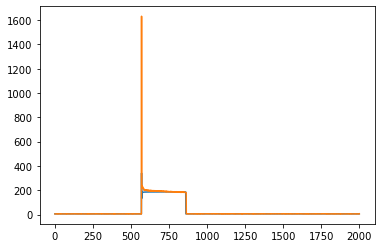

In [101]:
plt.plot(predict[74000:76000])
plt.plot(y[74000:76000])

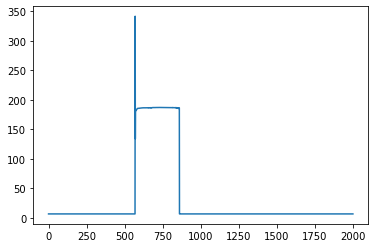

In [102]:
plt.plot(predict[74000:76000])

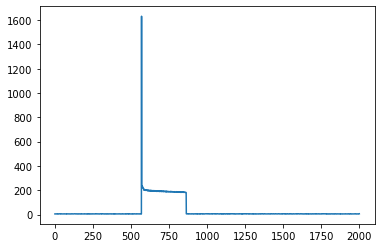

In [103]:
plt.plot(y[74000:76000])